In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_theme('paper')
sns.set_style('whitegrid')


In [2]:
MY_PALETTE = ['indianred','steelblue','darkkhaki', 'darkseagreen', 'gray']

In [12]:
def visualize_bar(data=None, x=None, y=None, figSize=(8,4), title="", hue="", palette=MY_PALETTE, x_label_rot=0, xlabel="", ylabel="", save=""):
    
    title_opt = {'fontfamily':"Helvetica",
                 'fontsize':14,
                 'fontweight':'bold'}

    axis_label_opt = {'fontfamily':"Helvetica",
                'fontsize':12,
                'fontweight':'bold'}
    
    data_val_opt = {'fontfamily':"Helvetica",
                'fontsize':9,
                'fontweight':600}


    fig,ax = plt.subplots(figsize=figSize)

    ax = sns.barplot(data=data, x=x, y=y, hue=hue, palette= palette)
    sns.despine()
    # for _,s in ax.spines.items():
        # s.set_color('black')
        # s.set_linewidth(1)
    # sns.set_style('ticks')

    plt.xticks(rotation=x_label_rot)
    plt.grid(False)
    for i,r in data.iterrows():
        plt.text(x=i, y=r[y]+2, s=r[y], fontdict=data_val_opt)

    plt.title(title, fontdict=title_opt, pad=20)
    plt.xlabel(xlabel or x, fontdict=axis_label_opt)
    plt.ylabel(ylabel or y, fontdict=axis_label_opt)

    fig.tight_layout(pad=1.0)

    if save:
        plt.savefig(save, dpi=300)
    plt.show()

In [4]:
df = pd.read_csv("../data/Data_Extraction.csv")
df.head()

,Paper_Name,Paper_ID,Exp_ID,Treatment_ID,Measure_ID,Exp_ID_Cleaned,ES_ID,Title,Authors,Year,...,Avg_Perf_Worse_Adj,Synergy,Sd_Perf_Human,Sd_Perf_AI,Sd_Perf_HumanAI,Sd_Perf_Baseline,Sd_Perf_Worse,Est_ES,Notes,Notes_2
0,Lai_2020,1,1,1,1,1.1,1.1.1.1,"""Why is 'Chicago' Deceptive?"" Towards Building...","Lai, Vivian; Liu, Han; Tan, Chenhao",2020,...,0.546,0,0.3043,0.0,0.305268,0.0,0.3043,Yes,HAI = Guidelines,NaN
1,Lai_2020,1,1,2,1,1.1,1.1.2.1,"""Why is 'Chicago' Deceptive?"" Towards Building...","Lai, Vivian; Liu, Han; Tan, Chenhao",2020,...,0.546,0,0.3043,0.0,0.274096,0.0,0.3043,Yes,HAI = Random explanation,NaN
2,Lai_2020,1,1,3,1,1.1,1.1.3.1,"""Why is 'Chicago' Deceptive?"" Towards Building...","Lai, Vivian; Liu, Han; Tan, Chenhao",2020,...,0.546,0,0.3043,0.0,0.294732,0.0,0.3043,Yes,HAI = SP-LIME,NaN
3,Lai_2020,1,1,4,1,1.1,1.1.4.1,"""Why is 'Chicago' Deceptive?"" Towards Building...","Lai, Vivian; Liu, Han; Tan, Chenhao",2020,...,0.546,0,0.3043,0.0,0.243892,0.0,0.3043,Yes,HAI = SR,NaN
4,Lai_2020,1,1,5,1,1.1,1.1.5.1,"""Why is 'Chicago' Deceptive?"" Towards Building...","Lai, Vivian; Liu, Han; Tan, Chenhao",2020,...,0.546,0,0.3043,0.0,0.275080,0.0,0.3043,Yes,HAI = SR + guidelines,NaN


In [5]:
for c in df.columns:
    print(c)

Paper_Name
Paper_ID
Exp_ID
Treatment_ID
Measure_ID
Exp_ID_Cleaned
ES_ID
Title
Authors
Year
Venue
Exp_Design
Comp_Type
Task_Desc
Task_Data
Task_Data_Cleaned
Task_Data_IsCategoric
Task_Data_IsCode
Task_Data_IsImage
Task_Data_IsNumeric
Task_Data_IsText
Task_Data_IsVideo
Task_Output
Task_Output_Cleaned
Task_Type
AI_Type
AI_Data_In
AI_Data_Out
AI_Type_Cleaned
Final_Decision
Division_Labor
Condition_Name
AI_Expl_Incl
AI_Conf_Incl
AI_Expl_Type
Perf_Metric
Perf_Metric_Cleaned
Perf_Dir
N_Exp
N_Human
N_HumanAI
Participant_Type
Participant_Type_2
Participant_Source
Participant_Expert
Participant_Crowdworker
Avg_Perf_Human
Avg_Perf_AI
Avg_Perf_HumanAI
Avg_Perf_Human_Adj
Avg_Perf_AI_Adj
Avg_Perf_HumanAI_Adj
Baseline
Avg_Perf_Baseline_Adj
Avg_Perf_Worse_Adj
Synergy
Sd_Perf_Human
Sd_Perf_AI
Sd_Perf_HumanAI
Sd_Perf_Baseline
Sd_Perf_Worse
Est_ES
Notes
Notes_2


In [174]:
by_year_dict = (df.groupby(by='Year').count()['Paper_ID']).to_dict()
by_year = pd.DataFrame(by_year_dict.items(), columns=['Year', 'count'])
by_year.reset_index(drop=True,inplace=True)
by_year.sort_values(by='Year', inplace=True)
by_year

,Year,count
0,2020,68
1,2021,107
2,2022,130
3,2023,65


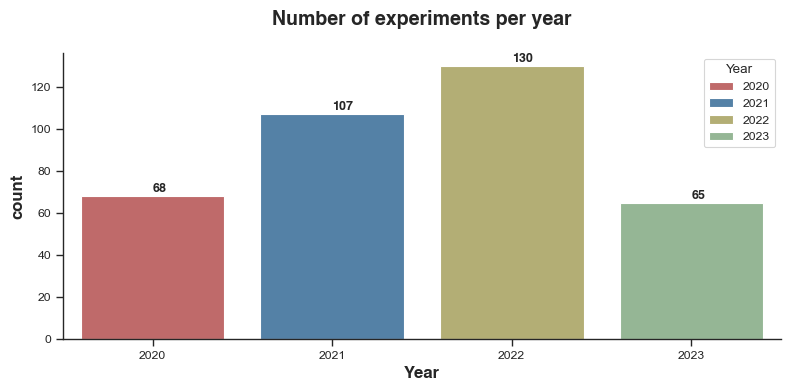

In [204]:
visualize_bar(data=by_year,
              x='Year',
              y='count',
              hue='Year',
              palette= MY_PALETTE[:4],
              figSize= (8,4),
              title="Number of experiments per year",
              save="../figures/n_pub_year.svg")
                

In [97]:
by_exp_design_dict = (df.groupby(by='Exp_Design').count()['Paper_ID']).to_dict()
by_exp_design = pd.DataFrame(by_exp_design_dict.items(), columns=['Experiment Type', 'count'])
by_exp_design.sort_values(by='count', inplace=True, ascending=False)
by_exp_design.reset_index(inplace=True)
by_exp_design

,index,Experiment Type,count
0,0,Between-Subjects,154
1,4,Within-Subjects,108
2,3,Other,55
3,2,"Mixed, Within-Subjects",43
4,1,"Mixed, Between-Subjects",10


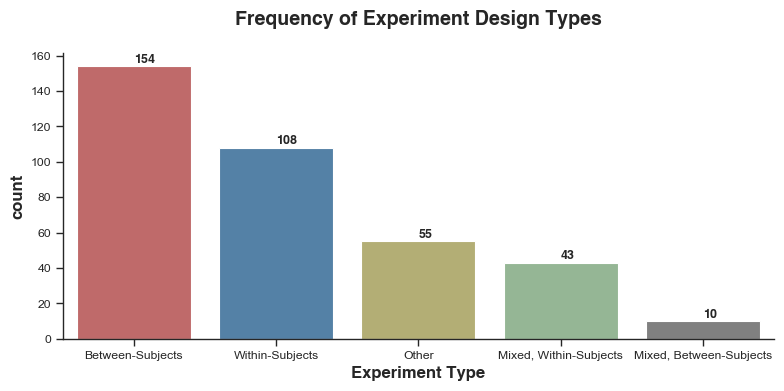

In [206]:
visualize_bar(data=by_exp_design,
              x='Experiment Type',
              y='count',
              hue='Experiment Type',
              palette= MY_PALETTE,
              x_label_rot=0,
              figSize= (8,4),
              title="Frequency of Experiment Design Types",
              save="../figures/exp_des_types.svg")
                

In [7]:
by_expert_dict = (df.groupby(by='Participant_Expert').count()['Paper_ID']).to_dict()
by_expert = pd.DataFrame(by_expert_dict.items(), columns=['Participant Expert', 'count'])
by_expert.sort_values(by='count', inplace=True, ascending=False)
by_expert.reset_index(inplace=True)
by_expert

,index,Participant Expert,count
0,0,No,269
1,1,Yes,101


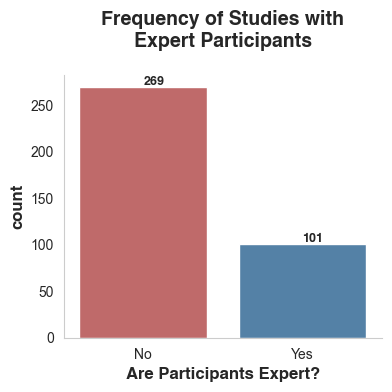

In [14]:
visualize_bar(data=by_expert,
              x='Participant Expert',
              y='count',
              hue='Participant Expert',
              palette= MY_PALETTE[:2],
              x_label_rot=0,
              figSize=(4,4),
              title="Frequency of Studies with\nExpert Participants",
              xlabel="Are Participants Expert?",
              save="../figures/n_expert.svg")

In [142]:
by_labor_div_dct = (df.groupby(by='Division_Labor').count()['Paper_ID']).to_dict()
by_labor_div = pd.DataFrame(by_labor_div_dct.items(), columns=['Division_Labor', 'count'])
by_labor_div.sort_values(by='count', inplace=True, ascending=False)
by_labor_div.reset_index(inplace=True)
by_labor_div

,index,Division_Labor,count
0,0,No,366
1,1,Yes,4


In [143]:
by_participant_type_dct = (df.groupby(by='Participant_Type').count()['Paper_ID']).to_dict()
by_participant_type = pd.DataFrame(by_participant_type_dct.items(), columns=['Participant Type', 'count'])
by_participant_type.sort_values(by='count', inplace=True, ascending=False)
by_participant_type.reset_index(inplace=True)
by_participant_type

,index,Participant Type,count
0,1,Crowdworkers,235
1,11,Physicians,26
2,13,Radiologists,15
3,10,Pathologists,14
4,22,Volunteers,11
5,18,Students,10
6,20,Technologists,6
7,17,Staff Members,6
8,9,Oncologists,6
9,7,Medical Professionals,5


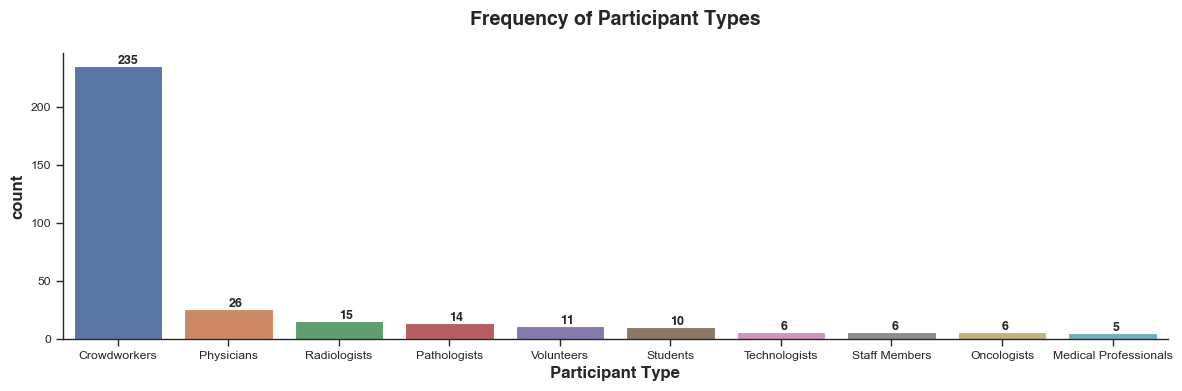

In [214]:
visualize_bar(data=by_participant_type[:10],
              x='Participant Type',
              y='count',
              hue='Participant Type',
              palette= 'deep',
              x_label_rot=0,
              figSize=(12,4),
              title="Frequency of Participant Types",
              save="../figures/n_participant_types.svg")

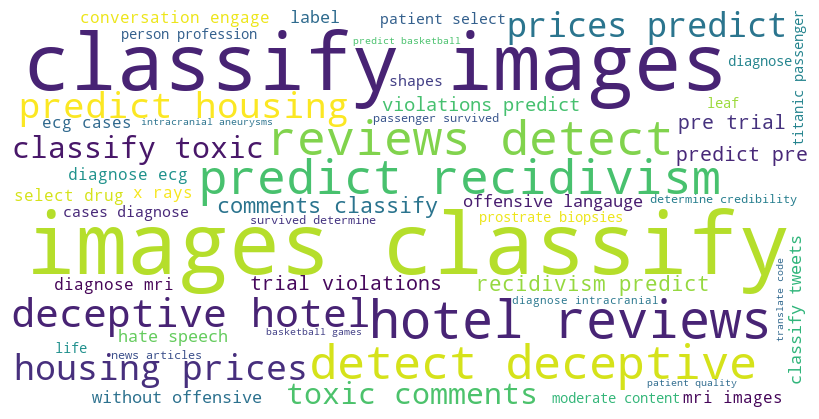

In [229]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Create a WordCloud object
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    stopwords=STOPWORDS,
    min_font_size=10
).generate(" ".join([str(x.lower()) for x in df['Task_Desc'] if (x) and (type(x)== str)]))

# Display the generated image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

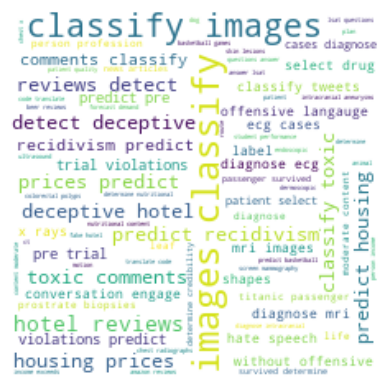

In [236]:
import numpy as np
from PIL import Image
text = " ".join([str(x.lower()) for x in df['Task_Desc'] if (x) and (type(x)== str)])
# Create a mask image
mask = np.array(Image.open("../figures/solid-circle-png-thumb16.png"))  # Replace "circle.png" with your mask image
wordcloud = WordCloud(mask=mask, background_color="white", contour_width=3, contour_color="black").generate(text)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()